In [1]:
from PIL import Image
import pytesseract
from IPython.display import display
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files (x86)\\Tesseract-OCR\\tesseract'


(width,height):(768, 347)


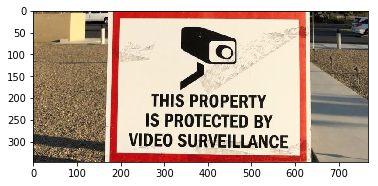

In [2]:
im = Image.open("roadsign.jpg")
fig, ax = plt.subplots()
ax.imshow(im)
print("(width,height):"+str(im.size))
text = pytesseract.image_to_string(im, lang = 'eng')


Enter x co-ordinate of top left vertice to crop : 160
Enter y co-ordinate of top left vertice to crop : 0
Enter x co-ordinate of bottom right vertice to crop : 630
Enter y co-ordinate of bottom right vertice to crop : 347


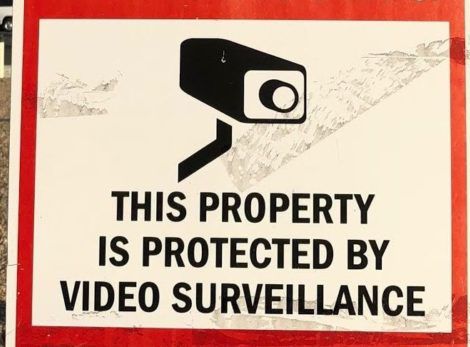

| &

!

?

THIS PROPERTY

IS PROTECTED BY
VIDEO SURVEILLANCE,


In [3]:
#Cropping Functionality for images

top_left_x=int(input("Enter x co-ordinate of top left vertice to crop : "))
top_left_y=int(input("Enter y co-ordinate of top left vertice to crop : "))
bottom_right_x=int(input("Enter x co-ordinate of bottom right vertice to crop : "))
bottom_right_y=int(input("Enter y co-ordinate of bottom right vertice to crop : "))

box = (top_left_x, top_left_y, bottom_right_x, bottom_right_y)
cropped_image = im.crop(box)
display(cropped_image)
cropped_text= pytesseract.image_to_string(cropped_image, lang = 'eng')
print(cropped_text)

(width,height):(1085, 1292)


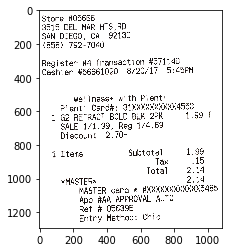

In [4]:
im = Image.open("receipt.jpg")
fig, ax = plt.subplots()
ax.imshow(im)
print("(width,height):"+str(im.size))
text = pytesseract.image_to_string(im, lang = 'eng')

In [5]:
print(text)

Store #05666

3515 DEL MAR HTS,RD
SAN DIEGO, CA 92130
(858) 792-7040

Register #4 Transaction #571140
Cashier #56661020 8/20/17 5:45PM

wellness+ with Plenti
Plenti Card#: 31XXXXXXXXXX4553
1 G2 RETRACT BOLD BLK 2PK 1.99 T
SALE 1/1.99, Reg 1/4.69
Discount 2.70-

1 Items Subtotal 1.99
Tax .15

Total 2.14
xMASTER* 2.14

MASTER card * #XXXXXXXXXXXX5485
Apo #AA APPROVAL AUTO

Ref # O5639E

Entry Method: Chip


In [6]:
#text localisation to find text areas in image and smartly crop it

import cv2
import numpy as np
from cv2 import boundingRect, countNonZero, cvtColor, drawContours, findContours, getStructuringElement, imread, morphologyEx, pyrDown, rectangle, threshold


large = imread("nameplate.jpg")
display(large)
# downsample and use it for processing
rgb = pyrDown(large)
# apply grayscale
small = cvtColor(rgb, cv2.COLOR_BGR2GRAY)
# morphological gradient
morph_kernel = getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
grad = morphologyEx(small, cv2.MORPH_GRADIENT, morph_kernel)
# binarize
_, bw = threshold(src=grad, thresh=0, maxval=255, type=cv2.THRESH_BINARY+cv2.THRESH_OTSU)
morph_kernel = getStructuringElement(cv2.MORPH_RECT, (9, 1))
# connect horizontally oriented regions
connected = morphologyEx(bw, cv2.MORPH_CLOSE, morph_kernel)
mask = np.zeros(bw.shape, np.uint8)
# find contours
im2, contours, hierarchy = findContours(connected, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
# filter contours
for idx in range(0, len(hierarchy[0])):
    rect = x, y, rect_width, rect_height = boundingRect(contours[idx])
    # fill the contour
    mask = drawContours(mask, contours, idx, (255, 255, 2555), cv2.FILLED)
    # ratio of non-zero pixels in the filled region
    r = float(countNonZero(mask)) / (rect_width * rect_height)
    if r > 0.45 and rect_height > 8 and rect_width > 8:
        rgb = rectangle(rgb, (x, y+rect_height), (x+rect_width, y), (0,255,0),3)

array([[[ 53,  53,  53],
        [ 54,  54,  54],
        [ 73,  73,  73],
        ...,
        [ 40,  40,  40],
        [ 39,  39,  39],
        [ 37,  37,  37]],

       [[130, 130, 130],
        [135, 135, 135],
        [140, 140, 140],
        ...,
        [ 43,  43,  43],
        [ 40,  40,  40],
        [ 41,  41,  41]],

       [[159, 159, 159],
        [169, 169, 169],
        [174, 174, 174],
        ...,
        [ 44,  44,  44],
        [ 42,  42,  42],
        [ 43,  43,  43]],

       ...,

       [[102, 102, 102],
        [138, 138, 138],
        [154, 154, 154],
        ...,
        [174, 174, 174],
        [175, 175, 175],
        [171, 171, 171]],

       [[ 93,  93,  93],
        [130, 130, 130],
        [152, 152, 152],
        ...,
        [114, 114, 114],
        [136, 136, 136],
        [132, 132, 132]],

       [[ 67,  67,  67],
        [ 99,  99,  99],
        [129, 129, 129],
        ...,
        [ 51,  51,  51],
        [ 54,  54,  54],
        [ 42,  42,  42]]

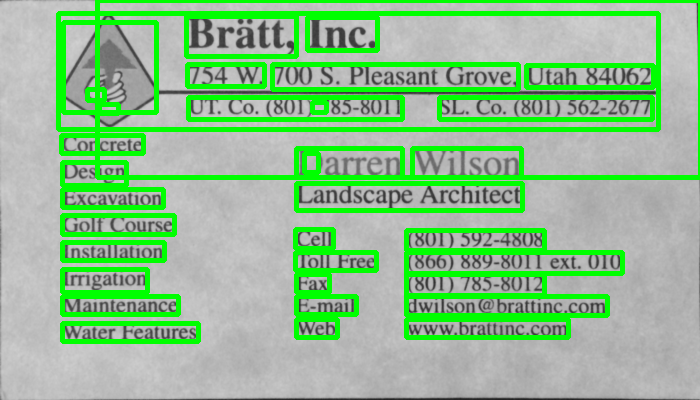

In [7]:
from PIL import Image
display(Image.fromarray(rgb))